In [1]:
# Imports
import pandas as pd
import time
import numpy as np
%matplotlib inline

# Constants
CNT = 'count'
LAT = 'latitude'
LNG = 'longitude'
DESC = 'description'
DT = 'datetime'
ADDR = 'address'
TWP = 'town'
ZIP = 'zip'
TITLE = 'title'
MONTH = 'month'
DAY = 'day'
WEEKDAY = 'weekday'
HOUR = 'hour'
YEAR = 'year'
RSN = 'reason'
SVC = 'service'
ST = 'station'

In [2]:
original_df = pd.read_csv('./911.csv')
df = original_df

# Projeto em Ciência de Dados, Análise e Visualização de Dados 2020PGS2M2

## Análise do dataset 911.csv

#### Gustavo Yamauchi Caruso

## Agenda

### Apresentação do dataset
- Contexto 
- Visão Geral
- Transformações

### Classificação das variáveis do dataset

### Análises


# Apresentação do dataset


911 é um número de emergência norte americano. Diferentemente do Brasil, todos os serviços de emergência podem ser acessados diretamente deste único número.

Cada linha do dataset 911.csv consiste em um conjunto de informações sobre uma ligação de emergência.

## Visão Geral

Foram registrados, para cada uma das **99492** ligações do dataset: 

In [3]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1


- `lat` -> Latitude
- `lng` -> Longitude
- `desc` -> Descrição
- `zip` -> CEP
- `title` -> Título
- `timeStamp` -> Data e Hora
- `twp` -> Cidade
- `addr` -> Endereço
- `E` -> flag 

Estas ligações foram feitas entre 10 de Dezembro de 2015 e 24 de Agosto de 2016

In [4]:
print('Shape', df.shape)
print('Colunas', df.columns)
print('Primeira chamada: ', df['timeStamp'].min())
print('Última chamada: ', df['timeStamp'].max())

Shape (99492, 9)
Colunas Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')
Primeira chamada:  2015-12-10 17:40:00
Última chamada:  2016-08-24 11:17:02


### Valores nulos

In [5]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

## Transformações

A seguir, algumas transformações serão realizadas nas colunas deste dataset. A primeira consistirá em renomear as colunas para o nome completo.

In [6]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1


In [7]:
df = df.rename(
    columns={
        "lat": LAT, 
        "lng": LNG, 
        "desc": DESC, 
        "addr": ADDR,
        "timeStamp": DT,
        "twp": TWP,
        "e": CNT
    })

### `Datetime`
A coluna `datetime` está carregando todas as informações de data e hora. Ao quebrá-la em ano, mês, dia, e hora, análises mais interessantes são possibilitadas.

In [8]:
df[DT] = pd.DatetimeIndex(df[DT])
df[MONTH] = df[DT].apply(lambda date_time: date_time.strftime('%m'))
df[HOUR] = df[DT].apply(lambda date_time: date_time.strftime('%H'))
df[DAY] = df[DT].apply(lambda date_time: date_time.strftime('%d'))
df[YEAR] = df[DT].apply(lambda date_time: date_time.strftime('%Y'))
df[WEEKDAY] = df[DT].apply(lambda date_time: date_time.strftime('%w'))

In [9]:
df.head(1)

,latitude,longitude,description,zip,title,datetime,town,address,count,month,hour,day,year,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,17,10,2015,4


### `title`
A coluna `title` tem mais de uma informação importantíssima para qualquer análise deste dataset: o serviço contatado e o motivo.

In [10]:
df.head(1)

,latitude,longitude,description,zip,title,datetime,town,address,count,month,hour,day,year,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,17,10,2015,4


In [11]:
def split_title(title, delimiter, idx):
    arr = title.split(':')
    if len(arr) <= idx:
        return arr[0]
    else:
        return arr[idx]
        
df[SVC] = df[TITLE].apply(lambda title: split_title(title, ':', 0))
df[RSN] = df[TITLE].apply(lambda title: split_title(title, ':', 1))
df[RSN] = df[RSN].str.replace('-', '')

### `description`

A coluna `description` apresenta mais de uma informação importante:

In [12]:
df[DESC][0]

'REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;'

In [13]:
df[DESC][100]

'CEDAR LN & WILLOW LN;  NEW HANOVER; Station 332; 2015-12-10 @ 22:22:38;'

Comparativo entre as informações presentes em `description` e `datetime`,  `town` e `address`:

In [14]:
def print_addr_desc_dt_town(idx):
    print(f'\nItem {idx}')
    print(DESC + ': ', df[DESC][idx])
    print(ADDR + ': ', df[ADDR][idx])
    print(TWP + ': ', df[TWP][idx])
    print(DT + ': ', df[DT][idx])

In [15]:
print_addr_desc_dt_town(0)
print_addr_desc_dt_town(100)
print_addr_desc_dt_town(200)
print_addr_desc_dt_town(350)


Item 0
description:  REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;
address:  REINDEER CT & DEAD END
town:  NEW HANOVER
datetime:  2015-12-10 17:40:00

Item 100
description:  CEDAR LN & WILLOW LN;  NEW HANOVER; Station 332; 2015-12-10 @ 22:22:38;
address:  CEDAR LN & WILLOW LN
town:  NEW HANOVER
datetime:  2015-12-10 22:27:02

Item 200
description:  CAMPUS DR & BUCK RD; BRYN ATHYN; 2015-12-11 @ 09:29:49-Station:STA11;
address:  CAMPUS DR & BUCK RD
town:  BRYN ATHYN
datetime:  2015-12-11 09:32:01

Item 350
description:  W CHURCH RD & WASHINGTON LN; CHELTENHAM; 2015-12-11 @ 16:10:41;
address:  W CHURCH RD & WASHINGTON LN
town:  CHELTENHAM
datetime:  2015-12-11 16:12:02


Nota-se também que existe a informação de Station na coluna `description`. Resta descobrir se está presente em todas as linhas.

In [16]:
df[DESC].str.split(';', expand=True)[2].str.contains('Station').value_counts()

True     63797
False    35695
Name: 2, dtype: int64

Existe um número considerável de linhas sem essa informação. É importante manter isso em mente.

In [17]:
df[ST] = df[DESC].str.split(';', expand=True)[2]
df[ST] = df[ST].apply(lambda x: x if 'Station' in x else np.nan)

In [18]:
df.head(1)

,latitude,longitude,description,zip,title,datetime,town,address,count,month,hour,day,year,weekday,service,reason,station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,17,10,2015,4,EMS,BACK PAINS/INJURY,Station 332


### Preenchendo linhas com o campo `address` NaN
É importante verificar se as linhas que tem o campo `address` com valor NaN são as mesmas que tem o endereço diferente do endereço encontrado na coluna `description`. De acordo com o slide de **Valores nulos**, a coluna `address` tinha 519 linhas nulas.

In [19]:
address_column_from_description = df[DESC].str.split(';', expand=True)[0].str.strip()
(df[ADDR] == address_column_from_description).value_counts()

True     98973
False      519
dtype: int64

In [20]:
matching_addresses = (df[ADDR] == address_column_from_description)
null_addresses = df[ADDR].isnull()
np.unique((matching_addresses[matching_addresses == False].index == null_addresses[null_addresses == True].index))

array([ True])

In [21]:
df[ADDR] = df[DESC].str.split(';', expand=True)[0].str.strip()

In [22]:
df.isnull().sum()

latitude           0
longitude          0
description        0
zip            12855
title              0
datetime           0
town              43
address            0
count              0
month              0
hour               0
day                0
year               0
weekday            0
service            0
reason             0
station        35695
dtype: int64

### Preenchendo linhas com o campo `town` NaN
Vamos executar o mesmo raciocínio com a coluna `town`

In [23]:
town_column_from_description = df[DESC].str.split(';', expand=True)[1].str.strip()
town_column_from_description.value_counts()

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
SALFORD           163
GREEN LANE         51
                   43
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: 1, Length: 69, dtype: int64

In [24]:
matching_town = (df[TWP] == town_column_from_description)
matching_town.value_counts()

True     99449
False       43
dtype: int64

In [25]:
matching_town
null_town = df[TWP].isnull()
np.unique((matching_town[matching_town == False].index == null_town[null_town == True].index))

array([ True])

In [26]:
df[TWP] = df[DESC].str.split(';', expand=True)[1].str.strip()
# df = df[df[TWP] != '']

In [27]:
df.isnull().sum()

latitude           0
longitude          0
description        0
zip            12855
title              0
datetime           0
town               0
address            0
count              0
month              0
hour               0
day                0
year               0
weekday            0
service            0
reason             0
station        35695
dtype: int64

### Captalização de Letras

Para seguir um padrão e ter todo o texto de uma mesma forma, as colunas de texto serão convertidas para letras minúsculas

In [28]:
df[TWP] = df[TWP].str.lower()
df[ADDR] = df[ADDR].str.lower()
df[WEEKDAY] = df[WEEKDAY].str.lower()
df[SVC] = df[SVC].str.lower()
df[ST] = df[ST].str.lower()
df[RSN] = df[RSN].str.lower()

In [29]:
df.head(1)

,latitude,longitude,description,zip,title,datetime,town,address,count,month,hour,day,year,weekday,service,reason,station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,new hanover,reindeer ct & dead end,1,12,17,10,2015,4,ems,back pains/injury,station 332


### Limpeza de dados
Algumas colunas que não serão necessárias podem ser deletadas do DataFrame

In [30]:
df = df.drop(columns=[DT, DESC, TITLE])

In [31]:
df.head(1)

,latitude,longitude,zip,town,address,count,month,hour,day,year,weekday,service,reason,station
0,40.297876,-75.581294,19525.0,new hanover,reindeer ct & dead end,1,12,17,10,2015,4,ems,back pains/injury,station 332


## Classificação das Variáveis:

### Quantitativas Contínuas: 
- latitude 
- longitude

### Qualitativas Nominais
- zip
- town
- address
- service
- reason
- station

### Qualitativas Ordinais
- day
- weekday
- month
- hour
- year

## Análises

## Análise Temporal

### Ligações agrupadas por ano

Vale ressaltar que o primeiro registro é do dia 10 de Dezembro de 2015.

<AxesSubplot:title={'center':'Ano X Numero de chamados'}, xlabel='year'>

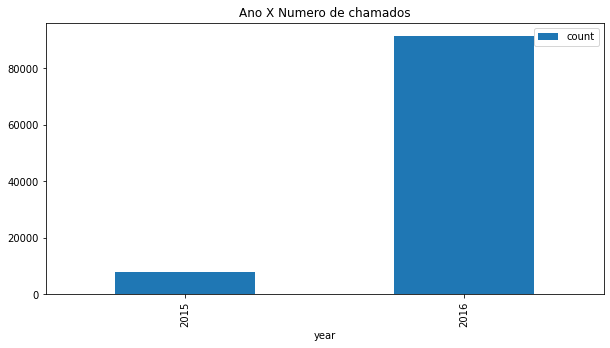

In [32]:
df.groupby(YEAR).agg({CNT: sum}).plot.bar(title='Ano X Numero de chamados', figsize=(10, 5))

### Ligações agrupadas por mês

<AxesSubplot:title={'center':'Mês X Numero de chamados'}, xlabel='month'>

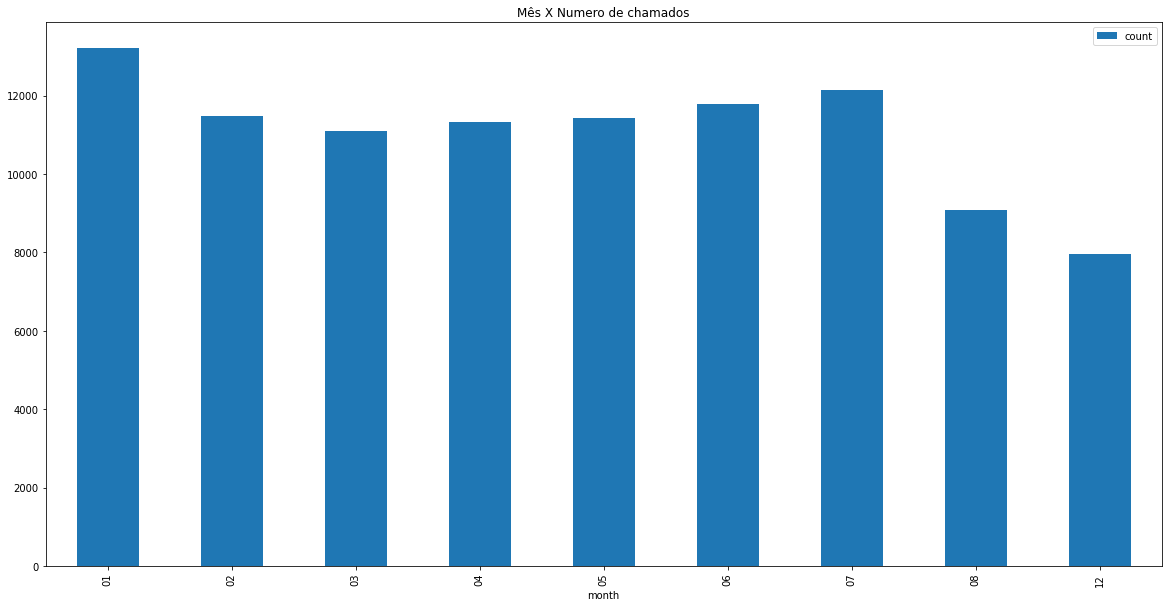

In [33]:
df.groupby(MONTH).agg({CNT: sum}).plot.bar(title='Mês X Numero de chamados', figsize=(20, 10))

### Ligações agrupadas por dia da semana

In [34]:
WEEKEND = 'weekend'
df[WEEKEND] = df[WEEKDAY].apply(lambda x: True if x == '5' or x == '6' else False)

<AxesSubplot:title={'center':'Fim de semana X Numero de chamados'}, xlabel='weekend'>

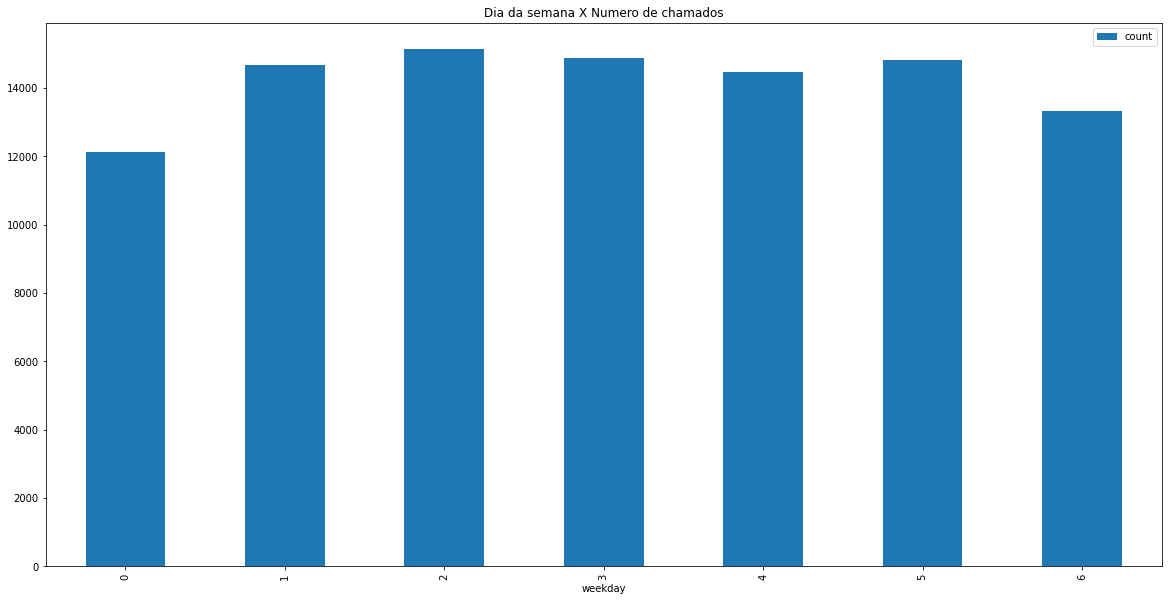

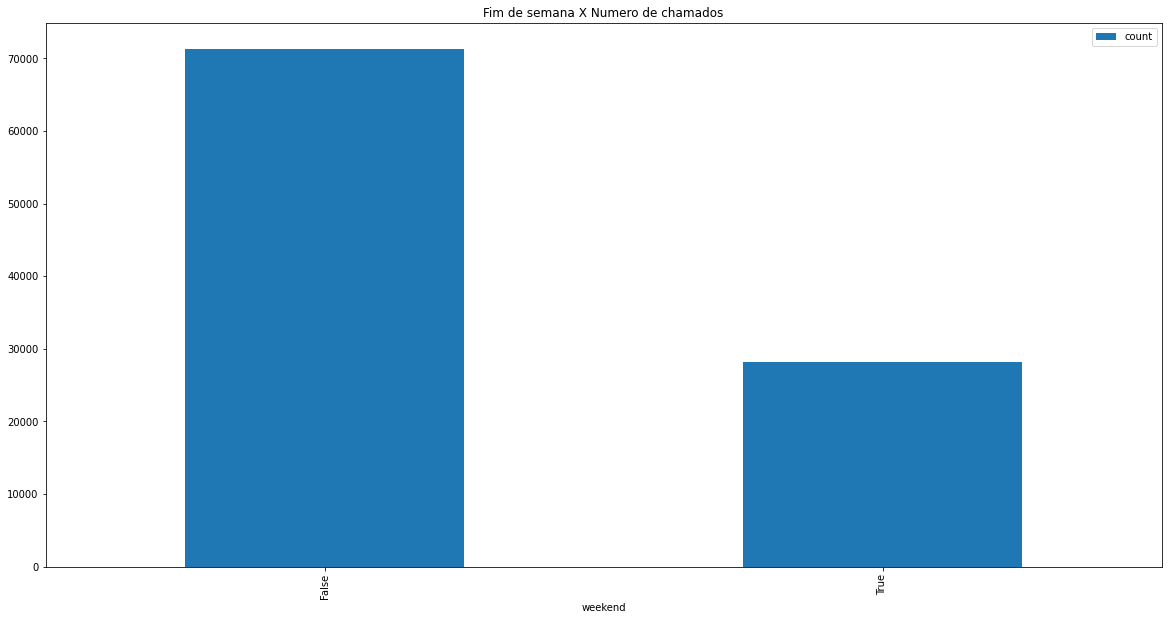

In [35]:
df.groupby(WEEKDAY).agg({CNT: sum}).plot.bar(title='Dia da semana X Numero de chamados', figsize=(20, 10))
df.groupby(WEEKEND).agg({CNT: sum}).plot.bar(title='Fim de semana X Numero de chamados', figsize=(20, 10))

### Ligações agrupadas por dia

<AxesSubplot:title={'center':'Dia X Numero de chamados'}, xlabel='day'>

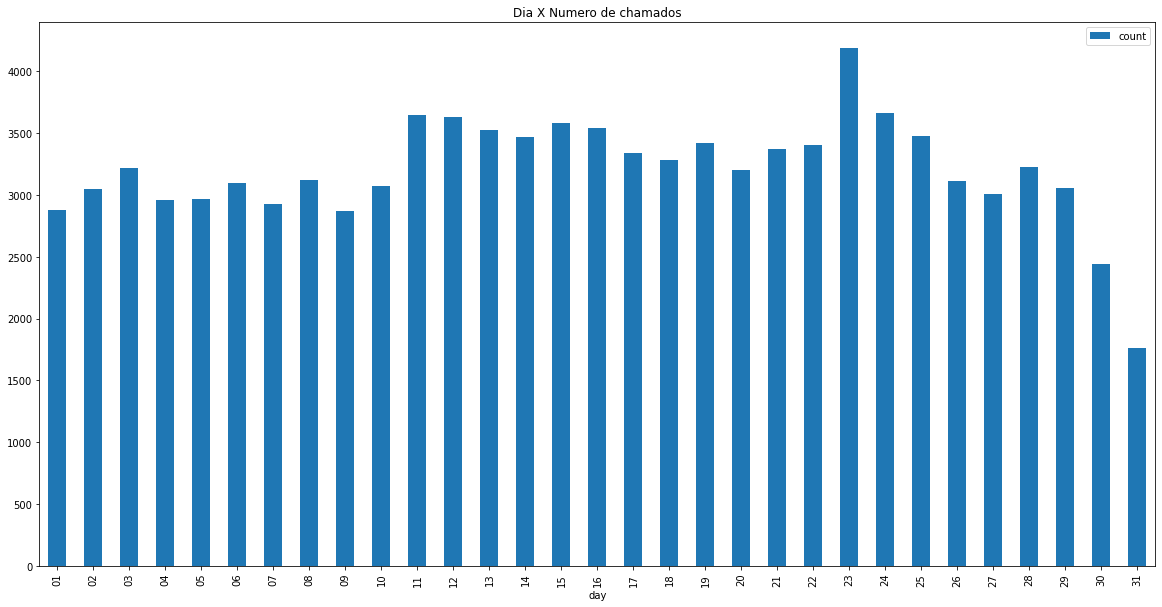

In [36]:
df.groupby(DAY).agg({CNT: sum}).plot.bar(title='Dia X Numero de chamados', figsize=(20, 10))

### Ligações agrupadas por hora

In [46]:
P = 'period'
# df[P] = df[HOUR].apply(lambda x: '00-11' if x > '00' and x < '12' else '12-18' if x > '12' and x < '18' else '19-23')
df[P] = df[HOUR].apply(lambda x: '00:00-06:00' if x > '00' and x < '06' else '06:00-12:00' if x > '05' and x < '12' else '12:00-18:00' if x > '11' and x < '18' else '18:00-00:00')

<AxesSubplot:title={'center':'Período X Número de chamados'}, xlabel='period'>

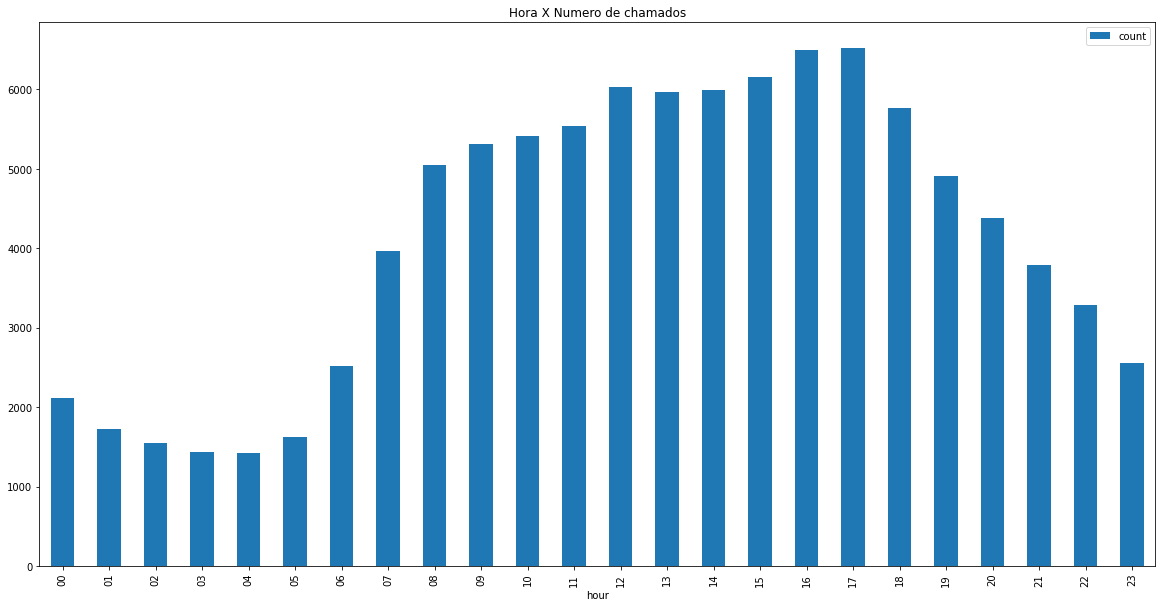

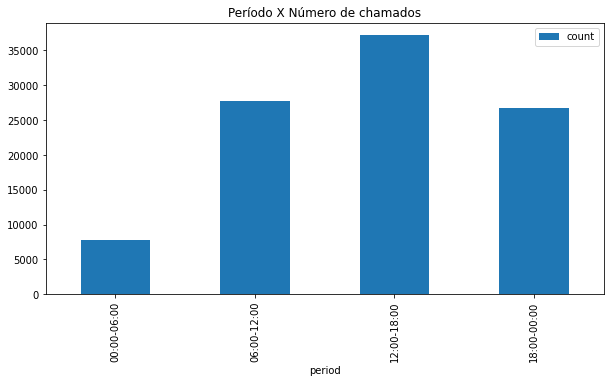

In [47]:
df.groupby(HOUR).agg({CNT: sum}).plot.bar(title='Hora X Numero de chamados', figsize=(20, 10))
df.groupby(P).agg({CNT: sum}).plot.bar(title='Período X Número de chamados', figsize=(10, 5))

### Ligações agrupadas por causa

<AxesSubplot:title={'center':'10 Maiores causas X Número de ligações'}>

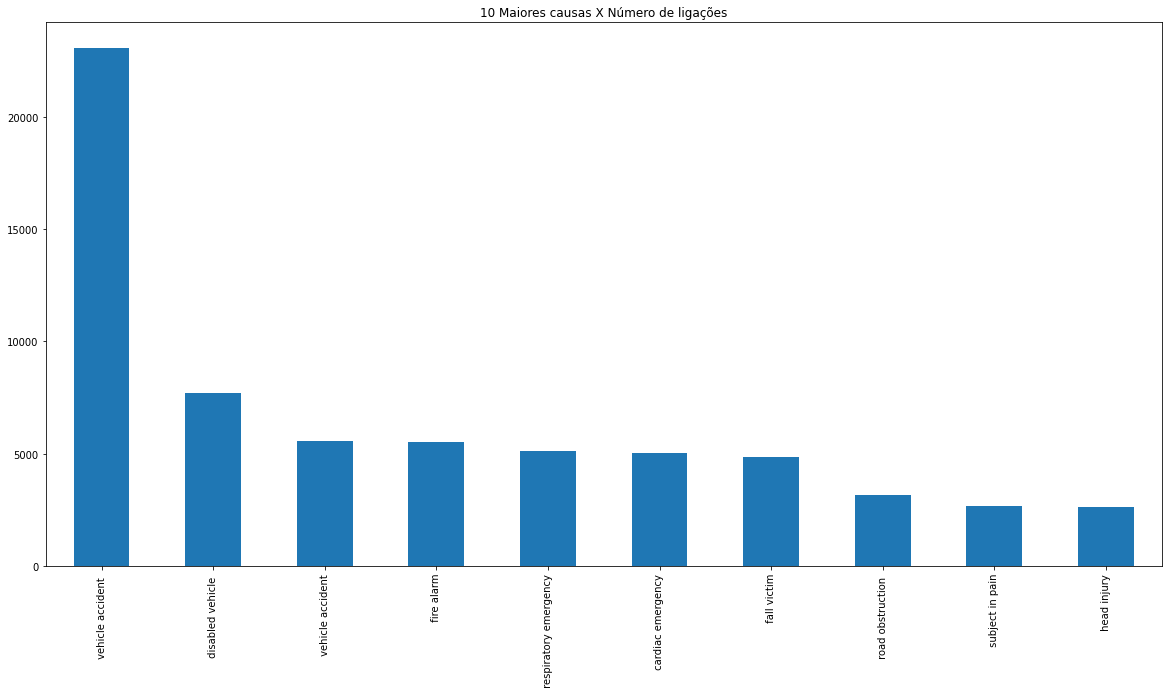

In [39]:
df[RSN].value_counts().head(10).plot.bar(title='10 Maiores causas X Número de ligações', figsize=(20, 10))

### Ligações agrupadas por Serviço

<AxesSubplot:title={'center':'Serviço X Número de ligações'}, xlabel='service'>

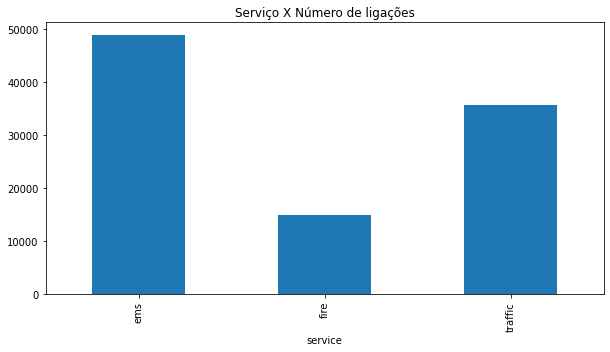

In [40]:
df.groupby(SVC).count()[CNT].plot.bar(title='Serviço X Número de ligações', figsize=(10, 5))

### Ligações agrupadas por cidade

<AxesSubplot:>

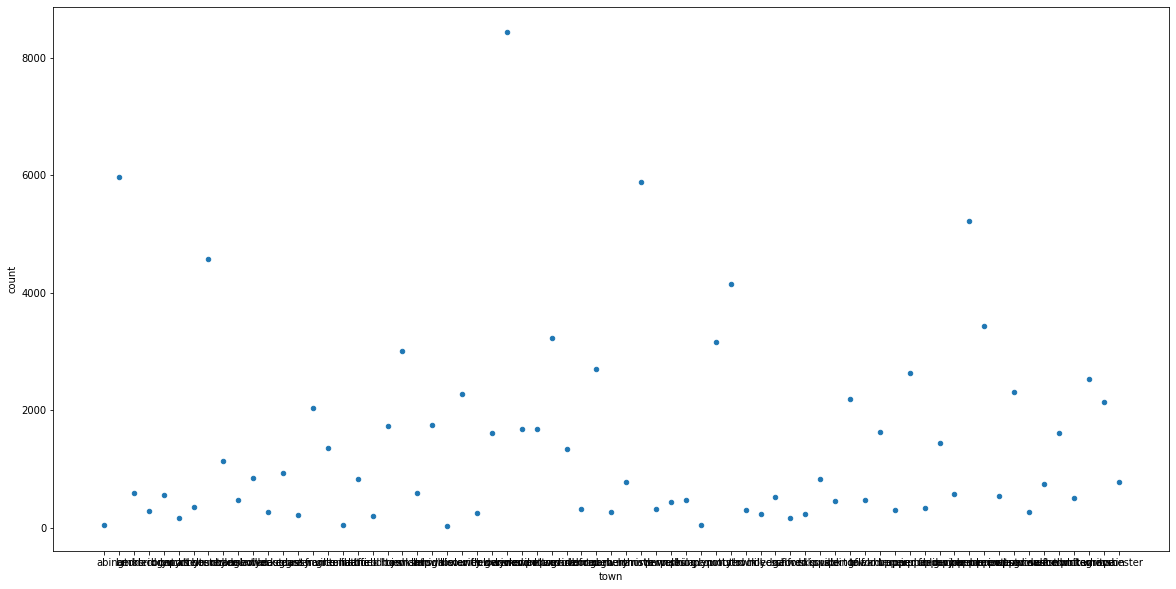

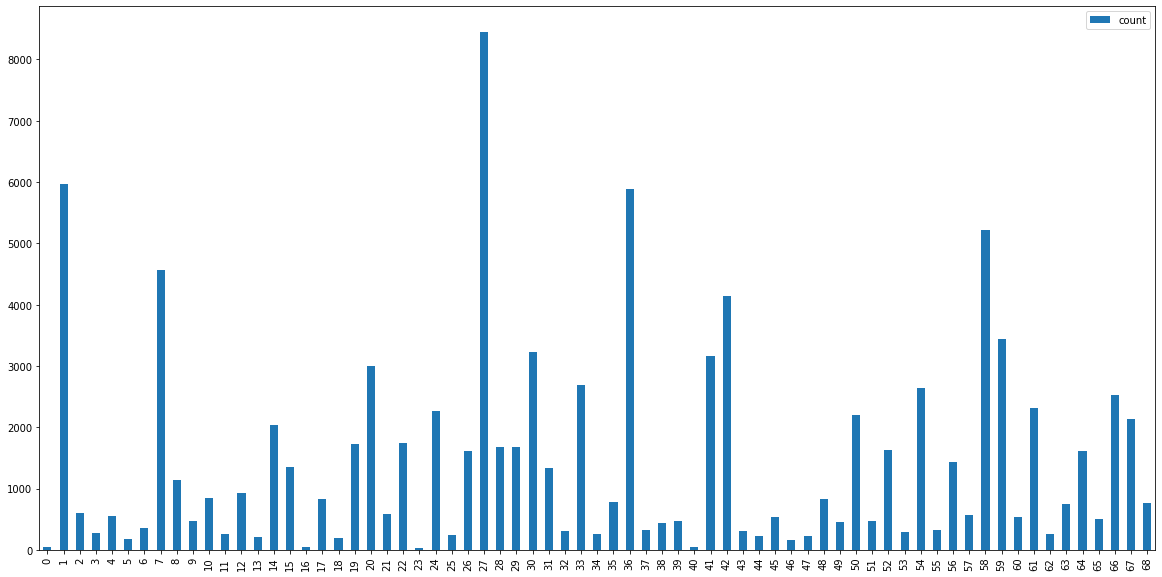

In [41]:
calls_by_city = df.groupby(TWP).agg({CNT: sum}).reset_index()
calls_by_city.plot.scatter(x=TWP, y=CNT, figsize=(20, 10))
calls_by_city.plot.bar(figsize=(20, 10))